In [6]:
from tqdm import tqdm
from tomllib import load
import matplotlib.pyplot as plt
import numpy as np

def load_config(config_path:str):
    '''Loads a config file in toml format. Returns a dictionary with the config values.'''
    with open(config_path, "rb") as f:
        config = load(f)
    return config

# Load config
config = load_config("../config.toml")
model_type = config["sam"]["model_type"]
checkpoint_path = '../' + config["sam"]["checkpoint_path"]
dataset_path = '../' + config["cytomine"]["dataset_path"]
img_path = dataset_path + 'processed/' + '4/'


ImportError: attempted relative import with no known parent package

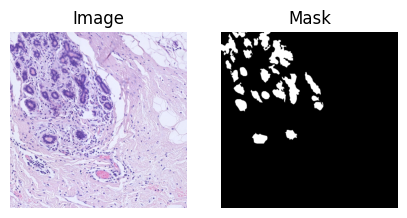

Image resolution: 1500x1500


In [2]:
img = plt.imread(img_path + 'img.jpg')
true_mask = plt.imread(img_path + 'mask0.jpg')
fig, axes = plt.subplots(1, 2, figsize=(5, 2.5))
axes[0].imshow(img)
axes[0].set_axis_off()
axes[0].set_title('Image')
axes[1].imshow(true_mask, cmap='gray')
axes[1].set_axis_off()
axes[1].set_title('Mask')
plt.show()
print(f'Image resolution: {img.shape[0]}x{img.shape[1]}')

In [3]:
from segment_anything import SamPredictor, sam_model_registry
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
sam = sam_model_registry[model_type](checkpoint=checkpoint_path).to(device)
predictor = SamPredictor(sam)
predictor.set_image(img)
masks, _, _ = predictor.predict()

Number of masks: 3


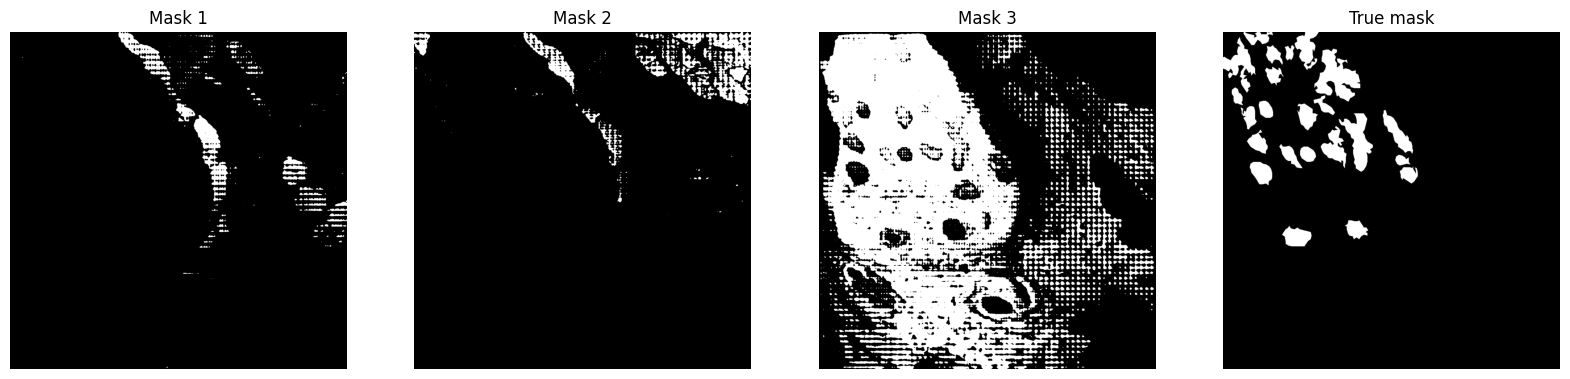

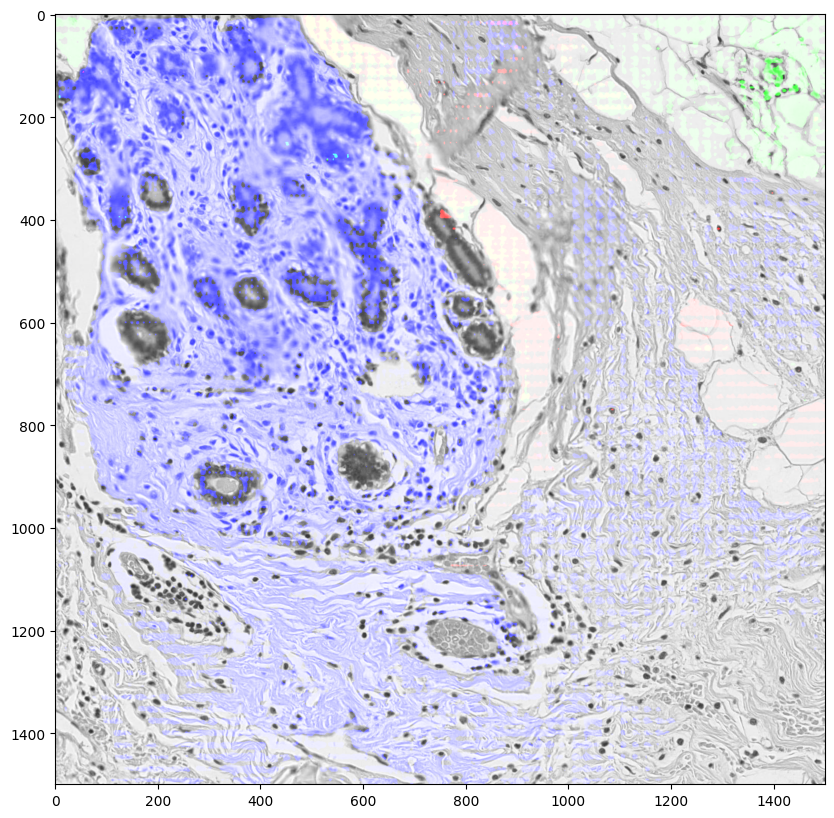

In [ ]:
import cv2
print(f'Number of predicted masks: {len(masks)}')

gray_scaled_img = np.empty_like(img)
for i in range(3):
    gray_scaled_img[:, :, i] = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def draw_masks(masks, img, alpha=0.5):
    '''Draws the masks on top of the image.'''
    masked_img = img.copy()
    for i in range(len(masks)):
        masked_img[:, :, i] = np.where(masks[i], 255, masked_img[:, :, i])
    masked_img = masked_img.astype(np.uint8)
    return cv2.addWeighted(img, alpha, masked_img, 1 - alpha, 0)
fig, axes = plt.subplots(1, len(masks) + 1, figsize=((len(masks) + 1) * 5, 5))
for i, mask in enumerate(masks):
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_axis_off()
    axes[i].set_title(f'Mask {i + 1}')
axes[-1].imshow(true_mask, cmap='gray')
axes[-1].set_axis_off()
axes[-1].set_title('True mask')
plt.show()

plt.figure(figsize=(10, 10))
res = draw_masks(masks, gray_scaled_img, 0.0)
plt.imshow(res)
plt.show()